# Euler-Lagrange Equation

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
from tqdm.notebook import tqdm
from numpy import sin,cos,tan,pi

Let us consider the classic harmonic oscillator, that can be imaged as a particle of zero volume and mass $m$ attached to one end of a horizontal spring attached to a wall by the other end. In particular the particle is pulled to given extension $q(0)$ when we begin to describe the system, and it is for the particle to move left and right freely. The speed of the particle is denoted by the generalized velocity $\dot{q}$, and we assume the spring is linear with elastic constant $k$. We introduce the Lagrangian of the dynamical system, i.e.

$$\mathcal{L}(q,\dot{q})=T(\dot{q})-V(q)=\frac{m}{2}\dot{q}^2-\frac{k}{2}q^2$$

we now consider the Euler-Lagrange equation that gives the trajectory that minimize the Hamiltonian action,

$$\frac{d}{dt}\Big(\frac{\partial\mathcal{L}}{\partial\dot{q}}\Big)-\frac{\partial\mathcal{L}}{\partial q}=0$$

$$\frac{d}{dt}\Big(m\dot{q}\Big)+kq=0 \\ \ddot{q}=-\Big(\frac{k}{m}\Big)q=-\lambda q$$

we wont to solve this system using the explicit Euler method and therefore we need to convert a second order ODE to a system of first order:

$$\frac{d}{dt}\begin{bmatrix}q \\ \dot{q} \end{bmatrix}=\begin{bmatrix}\dot{q}\\-\lambda q\end{bmatrix}=\begin{bmatrix} 0 & 1\\ -\lambda&0\end{bmatrix}\begin{bmatrix}q\\\dot{q}\end{bmatrix}$$

2000


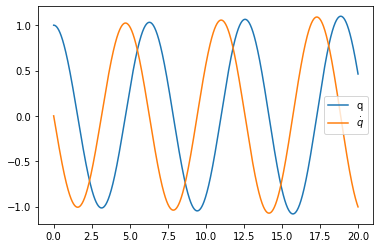

In [2]:
lam=1;
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,20.0)
DiffEq.setSolver("JACOBI",500);
b = spmat(2,2)
b.empty()
M = spmat(2,2)
K = spmat(2,2)
K.empty()
K[1,2] = 1; K[2,1]=-lam;
DiffEq.setCoeff(0,lambda t : b);
DiffEq.setCoeff(1,lambda t : (-1)*K);
DiffEq.setCoeff(2,lambda t : M);
qq0 = vec(2);
qq0.from_Array([1.0,0.0]);
DiffEq.setIC([qq0])
[H, QQ] = DiffEq.Euler(0.01)
Q = [qq[1] for qq in QQ]
Qdot = [qdot[2] for qdot in QQ]
plt.plot(H,Q,label="q")
plt.plot(H,Qdot,label="$\dot{q}$")
plt.legend()
print(len(Q))

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

dt = H[1]-H[0];
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, Q[i]]
    thisy = [0, 0]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, tqdm(np.arange(1, len(Q),10)),
                              interval=25, blit=True, init_func=init);
plt.close()
HTML(ani.to_html5_video())

### Double Pendulum
In this section we decide to use the Lagragian formalism to compute the equations of motions that characterize the double pendulum. We write the Lagrangian for the double pendulum using as two generalized coordinates the angle of the two pendulum $(\theta_1,\theta_2)$ and the generalized velocity $(\dot{\theta_1},\dot{\theta_2})$.

$$\mathcal{L}(\vec{\theta},\dot{\vec{\theta}})=T-V=\frac{1}{2}m_1\Big(\dot{x_1}^2+\dot{y_1}^2\Big)+\frac{1}{2}m_2\Big(\dot{x_2}^2+\dot{y_2}^2\Big)-m_1gy_1-m_2gy_2$$

we now express the Cartesian coordinates in term of the generalized coordinates, $(\theta_1,\theta_2)$ and $(\dot{\theta_1},\dot{\theta_2})$,

$$
x_1 = l_1\cos(\theta_1)\qquad\qquad y_1=-l_1\sin(\theta_1)
\\
x_2 = l_1\cos(\theta_1)+l_2\cos(\theta_2)\qquad\qquad y_1=-l_1\sin(\theta_1)-l_2\sin(\theta_2)
$$

$$\mathcal{L}(\vec{\theta},\dot{\vec{\theta}})=\frac{1}{2}(m_1+m_2)l_1^2\dot{\theta_1}^2+\frac{1}{2}m_2l_2^2\dot{\theta_2}^2+m_2l_1l_2\dot{\theta_{1}}\dot{\theta_2}\cos(\theta_1-\theta_2)+(m_1+m_2)gl_1\cos(\theta_1)+m_2gl_2\cos(\theta_2)$$

if we use the Euler-Lagrange equation $\frac{d}{dt}\Big(\frac{\partial\mathcal{L}}{\partial\dot{q}}\Big)-\frac{\partial\mathcal{L}}{\partial q}=0$ we obtain the following couple of second order ODE,

$$
(m_1+m_2)l_1\ddot{\theta_1}+m_2l_2\ddot{\theta_2}\cos(\theta_1-\theta_2)+m_2l_2\dot{\theta_2}^2\sin(\theta_1-\theta_2)+g(m_1+m_2)\sin(\theta_1)=0 \\
m_2l_2\ddot{\theta_2}+m_2l_1\ddot{\theta_1}\cos(\theta_1-\theta_2)-m_2l_1\dot{\theta_1}^2\sin(\theta_1-\theta_2)+m_2g\sin(\theta_2)=0
$$

once again to apply a explicit Euler method we express the second order ODE to a system of coupled first order ODE:

where $M=m_1+m_2$.

In [64]:
g = 9.8;
m1=1.0; m2=1.0; M=m1+m2;
l1=1.0; l2=1.0;
DiffEqs = NonLinearODEs(1);
DiffEqs.setDomain(0.0,20.0);
def f(y,t):
    th = -y[0][1]+y[0][3];
    den = -m2*(cos(th)*cos(th))+m1+m2;
    v = vec(4);
    v.from_Array([
            y[0][2],
            (sin(th)*m2*l1*(y[0][2]*y[0][2])*cos(th)+sin(th)*m2*l2*(y[0][4]*y[0][4])-g*M*sin(y[0][1])+m2*sin(y[0][3])*cos(th)*g)/(l1*den),
            y[0][4],
            (-sin(th)*M*l1*(y[0][2]*y[0][2])-m2*l2*(y[0][4]*y[0][4])*sin(th)*cos(th)+g*M*sin(y[0][1])*cos(th)-g*M*sin(y[0][3]))/(l2*den)
        ]);
    return v;
def m(t):
    I = spmat(4,4);
    return I;
DiffEqs.setCoeff(m,f)
IC = vec(4);
IC.from_Array([(2.0/3.0)*pi,0.0,-(pi/18.0),0.0])
DiffEqs.setIC([IC]);
[H, QQ] = DiffEqs.Euler(1e-4)
Q1 = [qq[1] for qq in QQ]
V1 = [qq[2] for qq in QQ]
Q2 = [qq[3] for qq in QQ]
V2 = [qq[4] for qq in QQ]

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

dt = H[1]-H[0]

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, l1*sin(Q1[i]), l1*sin(Q1[i])+l2*sin(Q2[i])]
    thisy = [0, -l1*cos(Q1[i]),-l1*cos(Q1[i])-l2*cos(Q2[i])]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, tqdm(np.arange(1, len(Q1),int(len(Q1)/400))),
                              interval=25, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
plt.close()
HTML(ani.to_html5_video())

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
plt.plot(Q1,V1,"--")
mat, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    mat.set_data(Q1[i],V1[i])
    return mat, time_text

ani = animation.FuncAnimation(fig, animate, tqdm(np.arange(1, len(Q1),int(len(Q1)/800))),
                              interval=100, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
plt.close()
HTML(ani.to_html5_video())